# Stroke Prediction using Machine Learning

## Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

import scipy.stats as st

import scipy.stats as stats
import statsmodels.api as sm

from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sma

from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,ConfusionMatrixDisplay,precision_score,recall_score,f1_score,classification_report,roc_curve,plot_roc_curve,auc,precision_recall_curve,plot_precision_recall_curve,average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q1. Read the dataset and view the first 10 rows of it.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
df = pd.read_csv(r'C:\Users\praty\OneDrive\Desktop\Data Science\Mini Projects\SLR, SLC & ULC\healthcare-dataset-stroke-data.csv')
df.head(10)

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   
5        Private          Urban             186.21  29.0  formerly smoked   
6        Private          Rural              70.09  27.4     never smoked   
7        Private          Urban              94.39  22.8     never smoked   
8        Private          Rural              76.15   NaN          Unknown   
9        Private          Urban              58.57  24.2          Unknown   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  
5       1  
6       1  
7       1  
8       1  
9       1

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q2. Check the shape/dimension of the dataset
.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [5]:
df.shape

(5110, 12)

The Dataset has 12 attributes and 5110 datapoints.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q3. Check for the missing values.Display number of missing values per column.
.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [6]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We have 201 Missing Values in bmi feature.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q4. Investigate and predict the missing BMI Value.
.
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [7]:
df['bmi'].isna().sum()

201

In [8]:
# Filling null values with average value
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [9]:
df['bmi'].isna().sum()

0

All Null Values have been successfully replace with the average of the column.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q5. Check the datatype, number of non null values and name of each variable in the dataset.
.
</b>
                </font>
            </div>
        </td>
    </tr>

In [10]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [11]:
df.notnull().sum()

id                   5110
gender               5110
age                  5110
hypertension         5110
heart_disease        5110
ever_married         5110
work_type            5110
Residence_type       5110
avg_glucose_level    5110
bmi                  5110
smoking_status       5110
stroke               5110
dtype: int64

In [12]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q6. Check the descriptive statistics of the dataset.
</b>
                </font>
            </div>
        </td>
    </tr>

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [14]:
df.describe().T

count          mean           std    min        25%  \
id                 5110.0  36517.829354  21161.721625  67.00  17741.250   
age                5110.0     43.226614     22.612647   0.08     25.000   
hypertension       5110.0      0.097456      0.296607   0.00      0.000   
heart_disease      5110.0      0.054012      0.226063   0.00      0.000   
avg_glucose_level  5110.0    106.147677     45.283560  55.12     77.245   
bmi                5110.0     28.893237      7.698018  10.30     23.800   
stroke             5110.0      0.048728      0.215320   0.00      0.000   

                         50%       75%       max  
id                 36932.000  54682.00  72940.00  
age                   45.000     61.00     82.00  
hypertension           0.000      0.00      1.00  
heart_disease          0.000      0.00      1.00  
avg_glucose_level     91.885    114.09    271.74  
bmi                   28.400     32.80     97.60  
stroke                 0.000      0.00      1.00

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q7. Visualize the proportion of Stroke samples in the dataset.
</b>
                </font>
            </div>
        </td>
    </tr>

0    4861
1     249
Name: stroke, dtype: int64


<AxesSubplot:xlabel='stroke', ylabel='count'>

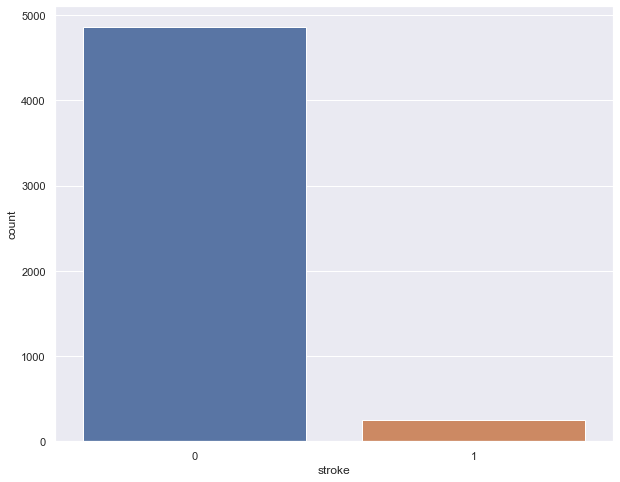

In [15]:
print(df.stroke.value_counts())
plt.figure(figsize=(10,8))
sns.set_theme(style='darkgrid')
sns.countplot(data=df,x='stroke')

There are 249 patients who have had a stroke and there are 4861 patients who never had a stroke.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q8. Visualize the Distribution of Male and Female Ages. Write the Observation.
</b>
                </font>
            </div>
        </td>
    </tr>

In [16]:
df.age.value_counts()

78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: age, Length: 104, dtype: int64

In [17]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='age'>

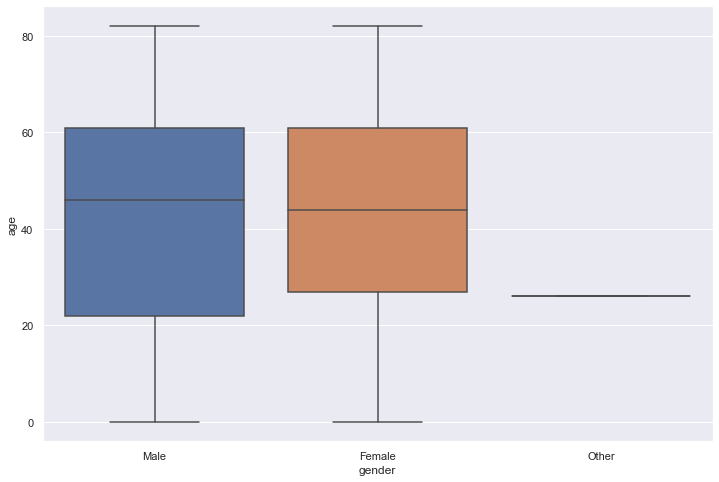

In [18]:
plt.figure(figsize=(12,8))
sns.set_theme(style='darkgrid')
sns.boxplot(data=df,x='gender',y='age')

In [19]:
# Importing Plotly Express inorder to create entire figures at once for better understanding
import plotly.express as px

In [20]:
fig = px.box(df, x="gender", y="age")
fig.show()

- The Range of the Ages for the Gender - Male and Female is the same, ranging from 0.08 to 82.
- The Lower Quartile for Males is 22, while the Upper Quartile is 61.
- The Lower Quartile for Females is 27, while the Upper Quartile for Females is same as Males, which is 61.
- The Median age for Males is 46 while the Median Age for Females is 44.
- We have only one patient listed as Other Gender who has the age of 26.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q9. Visualize the stroke sample based on
- BMI and Glucose Level
- BMI and Age

</b>
                </font>
            </div>
        </td>
    </tr>

#### a) BMI and Glucose Level

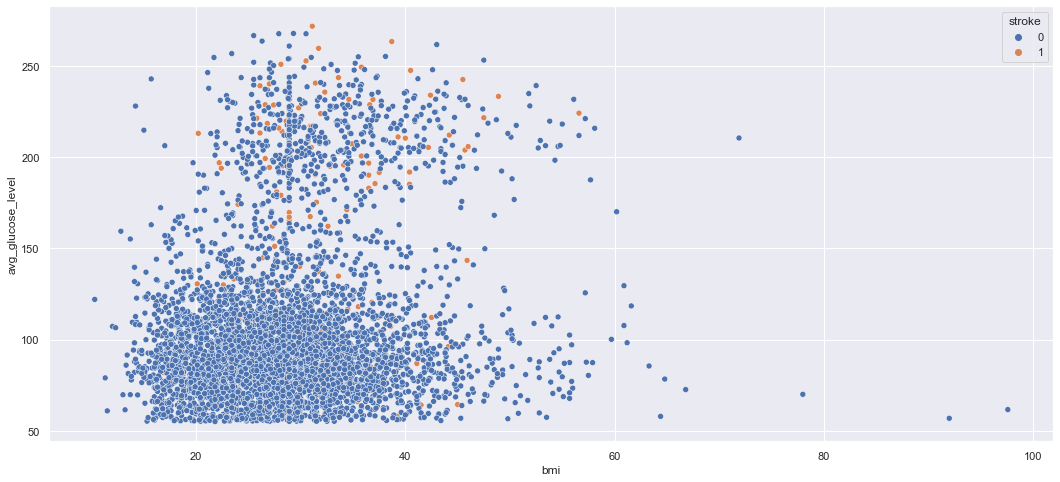

In [21]:
plt.figure(figsize=(18,8))
graph = sns.scatterplot(data=df,x='bmi',y='avg_glucose_level',hue='stroke')

#### b) BMI and Age

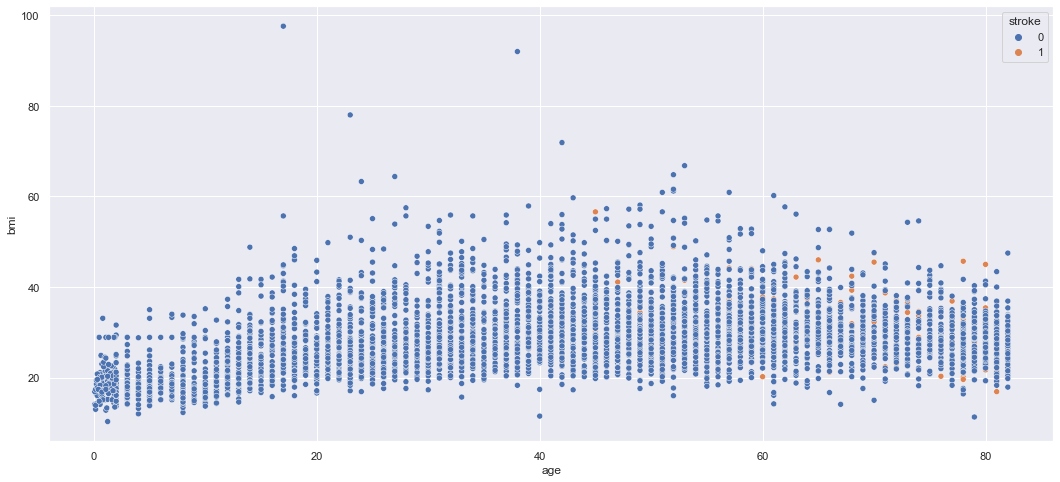

In [22]:
plt.figure(figsize=(18,8))
graph = sns.scatterplot(data=df,x='age',y='bmi',hue='stroke')

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q10. Using the pie chart visualizes the proportion of different smoking categories among the
stroke population.
</b>
                </font>
            </div>
        </td>
    </tr>

In [23]:
df['smoking_status'].value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

<AxesSubplot:ylabel='Smoking Categories among the Stroke Population'>

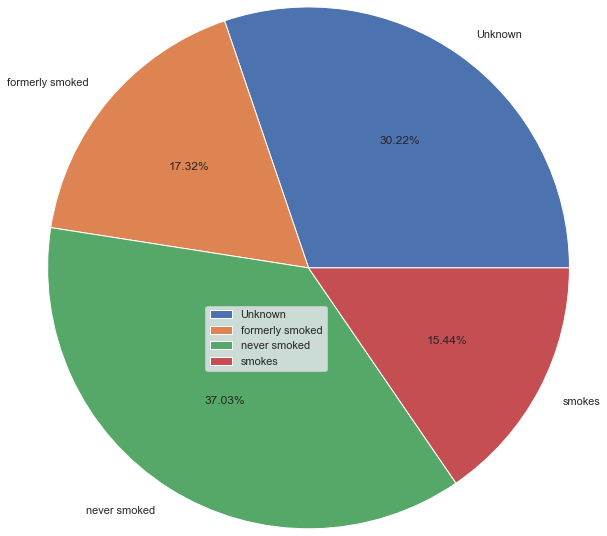

In [24]:
df.groupby('smoking_status').size().plot(kind='pie' , autopct='%.2f%%' , radius =3 ,legend=True ,label="Smoking Categories among the Stroke Population")

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q11. Perform hypothesis testing to find the significant variables.
</b>
                </font>
            </div>
        </td>
    </tr>

In [25]:
# Creating a copy dataframe to use in further steps of Hypothesis Testing
df_new = df.copy()

In [26]:
# Numerical Columns
df_numerical = df_new.select_dtypes(include=np.number)
df_numerical

id   age  hypertension  heart_disease  avg_glucose_level        bmi  \
0      9046  67.0             0              1             228.69  36.600000   
1     51676  61.0             0              0             202.21  28.893237   
2     31112  80.0             0              1             105.92  32.500000   
3     60182  49.0             0              0             171.23  34.400000   
4      1665  79.0             1              0             174.12  24.000000   
...     ...   ...           ...            ...                ...        ...   
5105  18234  80.0             1              0              83.75  28.893237   
5106  44873  81.0             0              0             125.20  40.000000   
5107  19723  35.0             0              0              82.99  30.600000   
5108  37544  51.0             0              0             166.29  25.600000   
5109  44679  44.0             0              0              85.28  26.200000   

      stroke  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
5105       0  
5106       0  
5107       0  
5108       0  
5109       0  

[5110 rows x 7 columns]

#### Removing the numerical features which has Categorical Values

In [27]:
df_numerical.drop(['hypertension', 'heart_disease'], axis=1, inplace = True)

In [28]:
df_numerical.head()

id   age  avg_glucose_level        bmi  stroke
0   9046  67.0             228.69  36.600000       1
1  51676  61.0             202.21  28.893237       1
2  31112  80.0             105.92  32.500000       1
3  60182  49.0             171.23  34.400000       1
4   1665  79.0             174.12  24.000000       1

#### NUMERICAL COLUMNS SIGNIFICANCE TESTING ON THE TARGET COLUMN

Using a Linear Regression Model to generate p-value of all the Numerical Columns to test the Significance of the columns on the Target Column.

Splitting the Dataset into Dependent and Independent Variable

In [29]:
X = df_numerical.iloc[:,:-1]

y = df_numerical.iloc[:,-1]

X2 = sma.add_constant(X)

import statsmodels.api as sm
import pandas as pd 

log_reg = sm.Logit(y, X2).fit()

print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.156492
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5105
Method:                           MLE   Df Model:                            4
Date:                Sat, 11 Feb 2023   Pseudo R-squ.:                  0.1965
Time:                        14:27:06   Log-Likelihood:                -799.68
converged:                       True   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 2.421e-83
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.8107      0.517    -15.107      0.000      -8.824      -6.797
id      

From the above logistic regression model, we can see that p-value for following columns is less than 0.05. So, we can say that following columns are significant.

- age
- avg_glucose_level

#### CATEGORICAL COLUMNS SIGNIFICANCE TESTING ON THE TARGET COLUMN

Performing Chi Square Contingency Test to check the dependency.

In [30]:
# Categorical Columns
df_cat = df_new.select_dtypes(include=np.object)
df_cat.head()

C:\Users\praty\AppData\Local\Temp\ipykernel_14720\3632476946.py:2: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



gender ever_married      work_type Residence_type   smoking_status
0    Male          Yes        Private          Urban  formerly smoked
1  Female          Yes  Self-employed          Rural     never smoked
2    Male          Yes        Private          Rural     never smoked
3  Female          Yes        Private          Urban           smokes
4  Female          Yes  Self-employed          Rural     never smoked

In [31]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

categorical_car_to_trasform = ['gender', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status']

for c in categorical_car_to_trasform:
    le.fit(df[c])
    df_new[c] = le.transform(df_new[c])
    category_labels = dict(zip(le.classes_, le.transform(le.classes_)))
    print(category_labels)
    print("====================================================================")

{'Female': 0, 'Male': 1, 'Other': 2}
{'No': 0, 'Yes': 1}
{'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
{'Rural': 0, 'Urban': 1}
{'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


In [32]:
for var_name in categorical_car_to_trasform:
    print(f"=========================================={var_name}==================================================")
    print(f"H0: {var_name} and Target are independent ")
    print(f"H1: {var_name} and Target are not independent [are dependent] ")
    stat, p, dof, expected = chi2_contingency(pd.crosstab(df_new['stroke'],df_new[var_name]))
    prob = 0.95
    alpha = 1.0 - prob
    print('The alpha/significance level = %.3f' % alpha)
    print('The p-value is = %.2f' % p)
    if p <= alpha:
        print('Reject the Null Hypothesis (Reject H0) because p')
        print("Thus we go with")
        print(f"H1: {var_name} and Target are not independent [are dependent] ")
        # print(f"=================================Statically=={var_name}==================================================")
    else:
        print('Accept the Null Hypothesis (Do not reject H0)')
        print("Thus we go with")
        print(f"H0: {var_name} and Target are independent ")

==========================================gender==================================================
H0: gender and Target are independent 
H1: gender and Target are not independent [are dependent] 
The alpha/significance level = 0.050
The p-value is = 0.79
Accept the Null Hypothesis (Do not reject H0)
Thus we go with
H0: gender and Target are independent 
==========================================ever_married==================================================
H0: ever_married and Target are independent 
H1: ever_married and Target are not independent [are dependent] 
The alpha/significance level = 0.050
The p-value is = 0.00
Reject the Null Hypothesis (Reject H0) because p
Thus we go with
H1: ever_married and Target are not independent [are dependent] 
==========================================work_type==================================================
H0: work_type and Target are independent 
H1: work_type and Target are not independent [are dependent] 
The alpha/significance level = 0.

From the above Test, we can conclude that the below Categorical Features are significan in predicting the Target Feature ( stroke ) :-
    
- ever_married
- work_type
- smoking_status

#### NUMERICAL COLUMNS ( HAVING CATEGORIES ) SIGNIFICANCE TESTING ON THE TARGET COLUMN

##### Assigning the Numerical Columns which have Categories in a Dataframe along with the Output Variable - 'stroke'

In [33]:
df_new_2 = df_new[['hypertension', 'heart_disease', 'stroke']]

df_new_2.head()

hypertension  heart_disease  stroke
0             0              1       1
1             0              0       1
2             0              1       1
3             0              0       1
4             1              0       1

In [34]:
df_new_2['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

##### Performing Chi Square Contingency Test  -

In [35]:
cols = ['hypertension', 'heart_disease']
for var_name in cols:
    print(f"=========================================={var_name}==================================================")
    print(f"H0: {var_name} and Target are independent ")
    print(f"H1: {var_name} and Target are not independent [are dependent] ")
    stat, p, dof, expected = chi2_contingency(pd.crosstab(df_new_2['stroke'],df_new_2[var_name]))
    prob = 0.95
    alpha = 1.0 - prob
    print('The alpha/significance level = %.3f' % alpha)
    print('The p-value is = %.2f' % p)
    if p <= alpha:
        print('Reject the Null Hypothesis (Reject H0) because p')
        print("Thus we go with")
        print(f"H1: {var_name} and Target are not independent [are dependent] ")
        #print(f"=================================Statically=={var_name}==================================================")
    else:
        print('Accept the Null Hypothesis (Do not reject H0)')
        print("Thus we go with")
        print(f"H0: {var_name} and Target are independent ")

==========================================hypertension==================================================
H0: hypertension and Target are independent 
H1: hypertension and Target are not independent [are dependent] 
The alpha/significance level = 0.050
The p-value is = 0.00
Reject the Null Hypothesis (Reject H0) because p
Thus we go with
H1: hypertension and Target are not independent [are dependent] 
==========================================heart_disease==================================================
H0: heart_disease and Target are independent 
H1: heart_disease and Target are not independent [are dependent] 
The alpha/significance level = 0.050
The p-value is = 0.00
Reject the Null Hypothesis (Reject H0) because p
Thus we go with
H1: heart_disease and Target are not independent [are dependent] 


From the above analysis, we can say that following columns are significantly dependent with the output variable are :- 

- hypertension 
- heart_disease 

### From the Statistical Hypothesis Testing, we can conclude that the following features are significant in predicting the Output Variable - 'stroke' :-

- age
- avg_glucose_level
- ever_married
- work_type
- smoking_status
- hypertension
- heart_disease

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q12. Drop the unnecessary columns.
</b>
                </font>
            </div>
        </td>
    </tr>

In [36]:
df.drop('id',axis=1,inplace=True)

In [37]:
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0          Urban             228.69  36.600000  formerly smoked       1  
1          Rural             202.21  28.893237     never smoked       1  
2          Rural             105.92  32.500000     never smoked       1  
3          Urban             171.23  34.400000           smokes       1  
4          Rural             174.12  24.000000     never smoked       1

We have dropped the 'id' feature as it is highly insignificant in predicting the Output Variable.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q13. Write the code to replace following categories columns in integer format as follow –
- a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)
- b) ever_married('Yes': 1, 'No': 0)
- c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

</b>
                </font>
            </div>
        </td>
    </tr>

In [38]:
# Before Encoding 
df.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level        bmi   smoking_status  stroke  
0          Urban             228.69  36.600000  formerly smoked       1  
1          Rural             202.21  28.893237     never smoked       1  
2          Rural             105.92  32.500000     never smoked       1  
3          Urban             171.23  34.400000           smokes       1  
4          Rural             174.12  24.000000     never smoked       1

Using Label Encoder to encode all the Categorical Columns :-

In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

categorical_car_to_trasform = ['gender', 'ever_married', 'work_type','Residence_type', 'smoking_status']

for c in categorical_car_to_trasform:
    le.fit(df[c])
    df[c] = le.transform(df[c])
    category_labels = dict(zip(le.classes_, le.transform(le.classes_)))
    print(category_labels)
    print("====================================================================")

{'Female': 0, 'Male': 1, 'Other': 2}
{'No': 0, 'Yes': 1}
{'Govt_job': 0, 'Never_worked': 1, 'Private': 2, 'Self-employed': 3, 'children': 4}
{'Rural': 0, 'Urban': 1}
{'Unknown': 0, 'formerly smoked': 1, 'never smoked': 2, 'smokes': 3}


In [40]:
# After Encoding
df.head()

gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               1             228.69  36.600000               1       1  
1               0             202.21  28.893237               2       1  
2               0             105.92  32.500000               2       1  
3               1             171.23  34.400000               3       1  
4               0             174.12  24.000000               2       1

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q14. Check the distribution of 'bmi' and 'stroke' columns in the dataset.
</b>
                </font>
            </div>
        </td>
    </tr>

In [41]:
def simple_eda(col_name):
    print(f"============================COLUMN NAME : {col_name} =============================")
    print("====> min value", df[col_name].min(), "====> max value", df[col_name].max())

    print("====> MEAN", df[col_name].mean(), "====> MEDIAN", df[col_name].median())

    Q1 = df[col_name].quantile(q=0.25)
    print("====> Q1 = ", Q1)

    Q3 = df[col_name].quantile(q=0.75)
    print("====> Q3 = ", Q3)

    IQR = Q3-Q1
    print("====> IQR = ", IQR)

    Lower_boundary = Q1 - 1.5 * IQR
    Upper_bounday = Q3 +  1.5 * IQR
    print("====>Lower_boundary :",Lower_boundary, "====>Upper_bounday:",Upper_bounday)

    plt.figure(figsize = (12,10))
    sns.histplot(df[col_name], kde=True)
    plt.title("HIST PLOT")
    print()
    print("====> from the hist plot, it looks like data is skewed and have outliers as well.")
    print("====> skewness: ", df[col_name].skew())

    plt.figure(figsize = (12,10))
    sns.boxplot(df[col_name], orient='h')
    plt.title("BOX PLOT")

============================COLUMN NAME : bmi =============================
====> min value 10.3 ====> max value 97.6
====> MEAN 28.89323691179472 ====> MEDIAN 28.4
====> Q1 =  23.8
====> Q3 =  32.8
====> IQR =  8.999999999999996
====>Lower_boundary : 10.300000000000006 ====>Upper_bounday: 46.29999999999999

====> from the hist plot, it looks like data is skewed and have outliers as well.
====> skewness:  1.0767160713842094


C:\Users\praty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



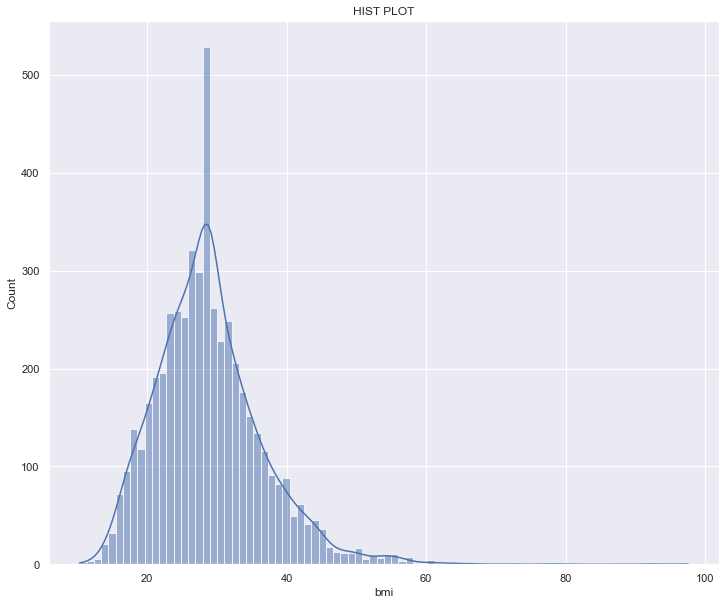

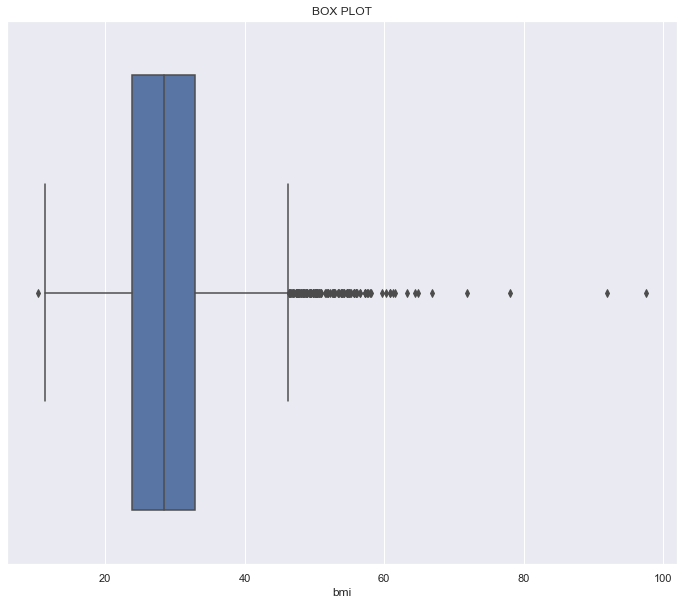

In [42]:
simple_eda('bmi')

'bmi' feature is Highly Skewed.

0    4861
1     249
Name: stroke, dtype: int64


C:\Users\praty\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='stroke', ylabel='count'>

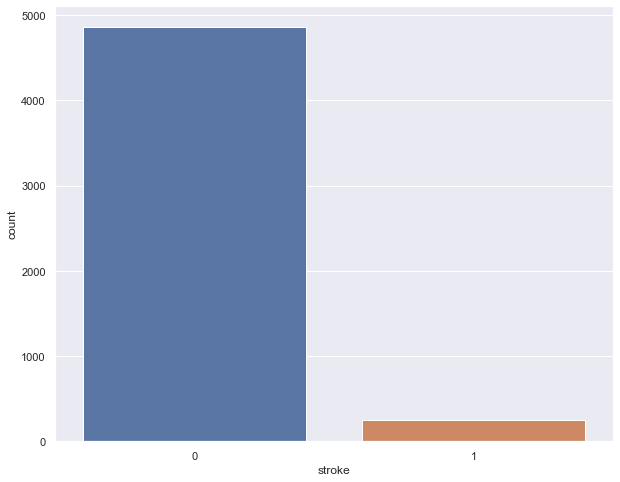

In [43]:
print(df['stroke'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(df['stroke'])

<AxesSubplot:xlabel='stroke', ylabel='Density'>

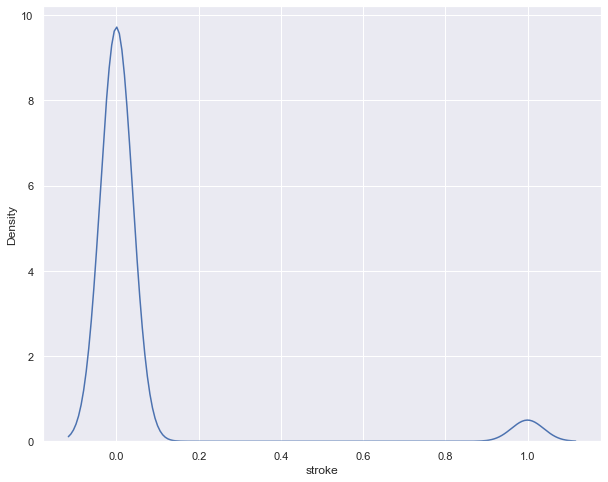

In [44]:
plt.figure(figsize=(10,8))
sns.kdeplot(df['stroke'])

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q15. List down columns that are highly skewed.
</b>
                </font>
            </div>
        </td>
    </tr>

In [45]:
df.skew()

gender               0.353012
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
work_type           -0.308617
Residence_type      -0.032107
avg_glucose_level    1.572284
bmi                  1.076716
smoking_status      -0.039234
stroke               4.193284
dtype: float64

The columns that are highly skewed are :-
    
- gender ( Right Skewed )
- age ( Left Skewed )
- hypertension ( Right Skewed )
- heart_disease ( Right Skewed )
- ever_married ( Left Skewed )
- work_type ( Left Skewed )
- avg_glucose_level ( Right Skewed )
- bmi ( Right Skewed )
- stroke ( Right Skewed )

Residence_type and smoking_status is almost symmterical.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q16. List down the columns that are highly kurtosis.
</b>
                </font>
            </div>
        </td>
    </tr>

In [46]:
df.kurt()

gender               -1.862882
age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
ever_married         -1.567985
work_type             0.144290
Residence_type       -1.999752
avg_glucose_level     1.680479
bmi                   3.623061
smoking_status       -1.317830
stroke               15.589736
dtype: float64

1. Platykurtic (kurtosis < 3.0) [ Less Outliers ] -
   - gender
   - age
   - ever_married
   - work_type
   - Redidence_type
   - avg_glucose_level
   - smoking_status
 
2. Leptokurtic (kurtosis > 3.0) [ More Outliers ] -
   - hypertension
   - heart_disease
   - stroke 
   
3. Mesokurtic (kurtosis = 3.0) [ Similar to Normal Distribution ] -
   - bmi ( ~ 3 )

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q17. Find the distribution of all variables with respect to the outcome 'stroke' variable.
</b>
                </font>
            </div>
        </td>
    </tr>

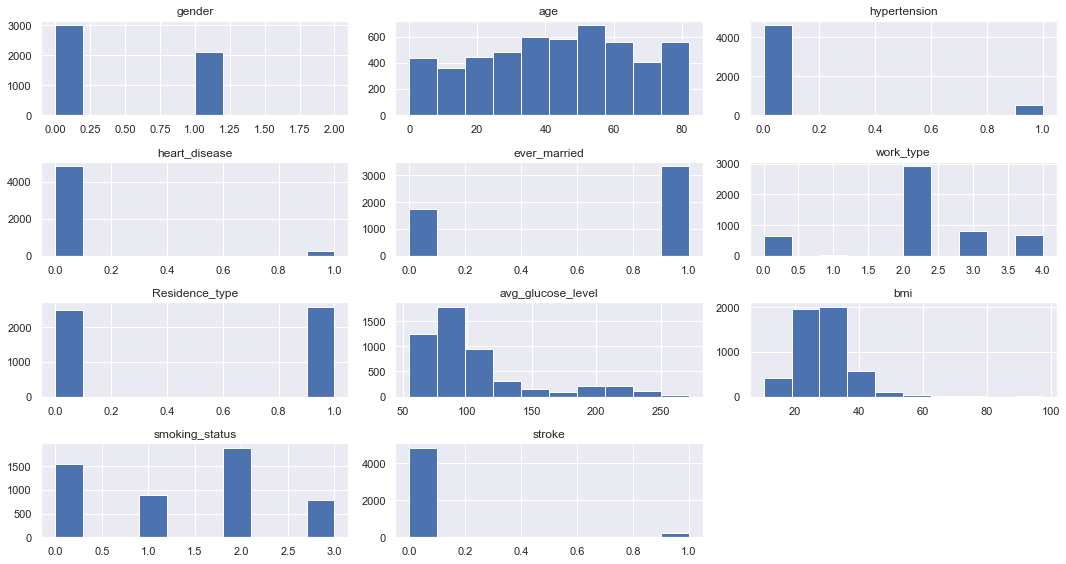

In [47]:
plt.rcParams['figure.figsize'] = [15,8]
df.hist()
plt.tight_layout()
plt.show()

#### CATEGORICAL FEATURES

1. GENDER - 

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

<Figure size 720x576 with 0 Axes>

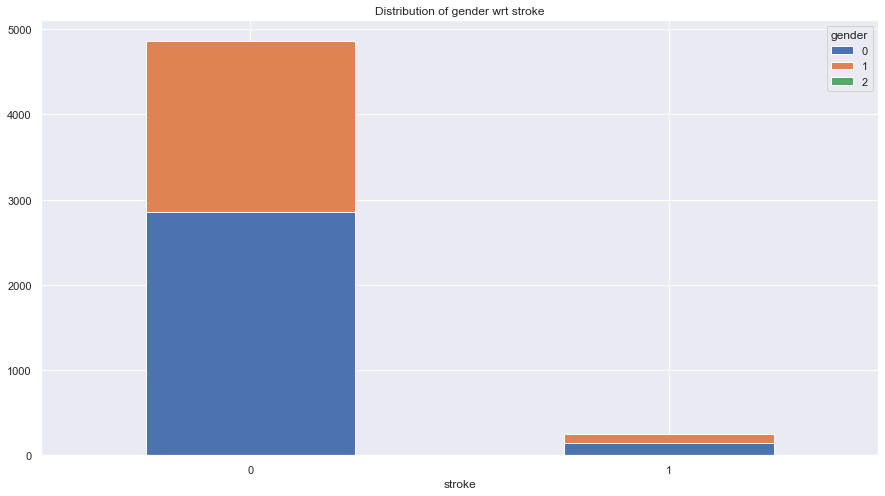

In [48]:
plt.figure(figsize=(10,8))
output = df.groupby(['stroke','gender'])['gender'].count().unstack().fillna(0)
output.plot(kind='bar', stacked=True)
plt.title('Distribution of gender wrt stroke')
plt.xticks(rotation=0, ha='center')

2. hypertension - 

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

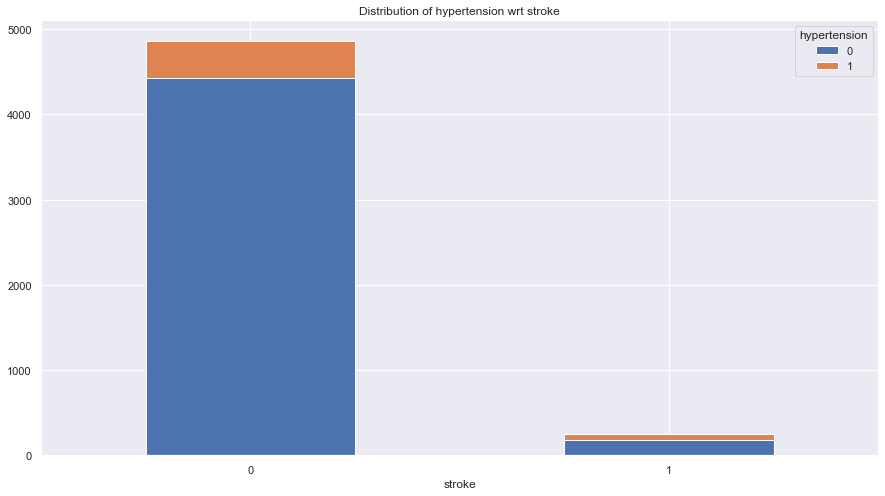

In [49]:
output = df.groupby(['stroke','hypertension'])['hypertension'].count().unstack().fillna(0)
output.plot(kind='bar', stacked=True)
plt.title('Distribution of hypertension wrt stroke')
plt.xticks(rotation=0, ha='center')

3. heart_disease - 

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

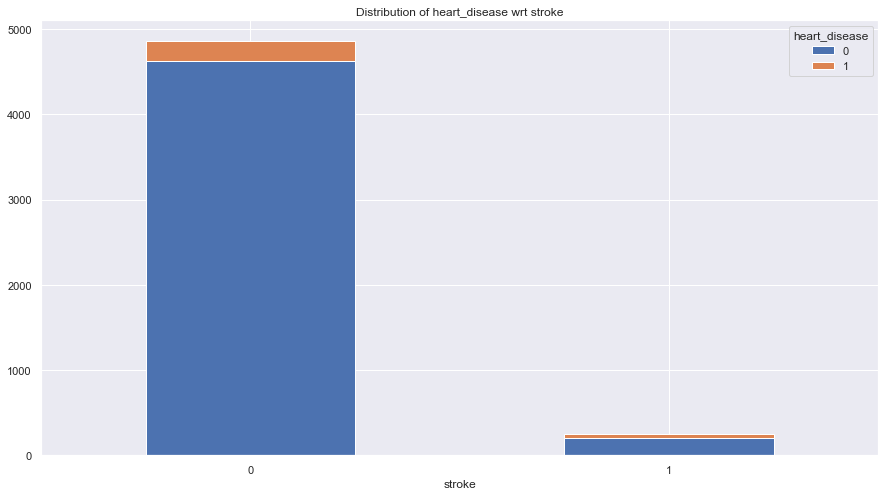

In [50]:
output = df.groupby(['stroke','heart_disease'])['heart_disease'].count().unstack().fillna(0)
output.plot(kind='bar', stacked=True)
plt.title('Distribution of heart_disease wrt stroke')
plt.xticks(rotation=0, ha='center')

4. ever_married - 

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

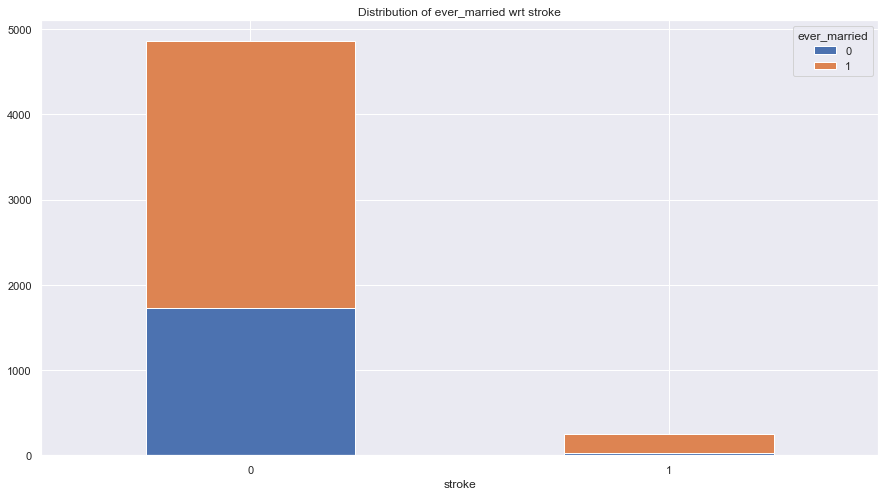

In [51]:
output = df.groupby(['stroke','ever_married'])['ever_married'].count().unstack().fillna(0)
output.plot(kind='bar', stacked=True)
plt.title('Distribution of ever_married wrt stroke')
plt.xticks(rotation=0, ha='center')

5. work_type - 

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

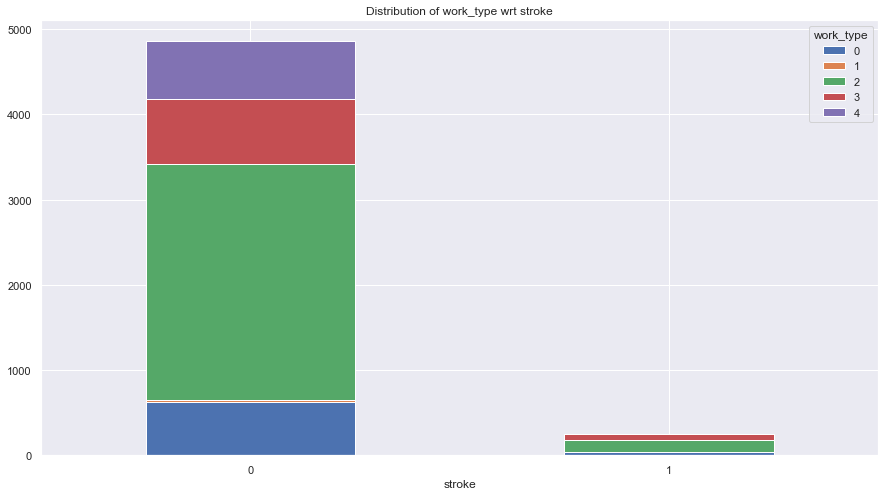

In [52]:
output = df.groupby(['stroke','work_type'])['work_type'].count().unstack().fillna(0)
output.plot(kind='bar', stacked=True)
plt.title('Distribution of work_type wrt stroke')
plt.xticks(rotation=0, ha='center')

6. Residence_type - 

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

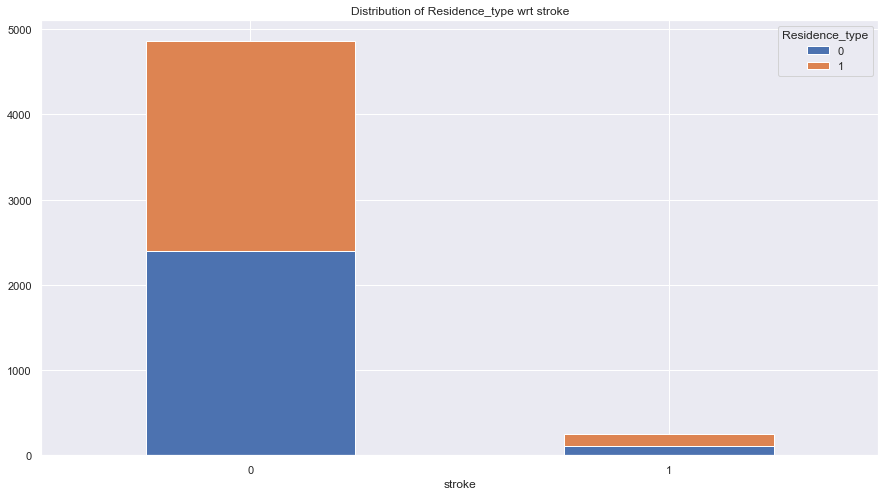

In [53]:
output = df.groupby(['stroke','Residence_type'])['Residence_type'].count().unstack().fillna(0)
output.plot(kind='bar', stacked=True)
plt.title('Distribution of Residence_type wrt stroke')
plt.xticks(rotation=0, ha='center')

7. smoking_status -

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

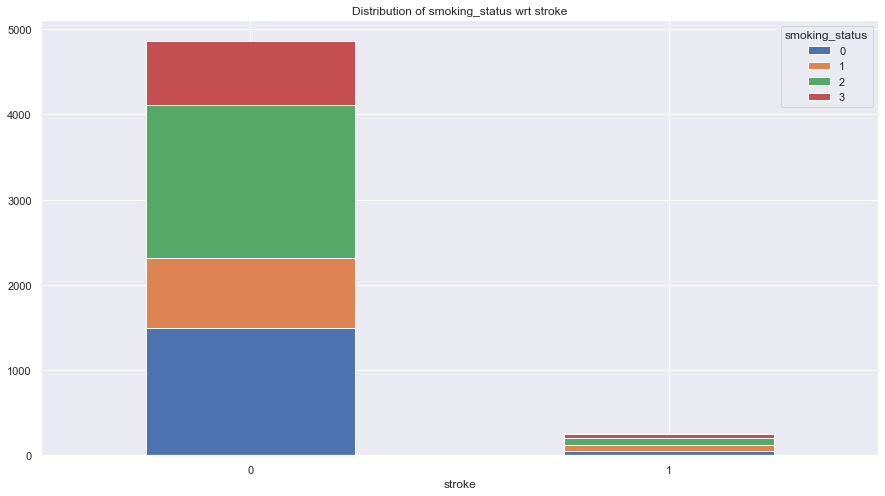

In [54]:
output = df.groupby(['stroke','smoking_status'])['smoking_status'].count().unstack().fillna(0)
output.plot(kind='bar', stacked=True)
plt.title('Distribution of smoking_status wrt stroke')
plt.xticks(rotation=0, ha='center')

#### NUMERICAL FEATURES

1. age - 

In [55]:
fig = px.box(df, x="stroke", y="age")
fig.show()

2. avg_glucose_level -

In [56]:
fig = px.box(df, x="stroke", y="avg_glucose_level")
fig.show()

3. bmi -

In [57]:
fig = px.box(df, x="stroke", y="bmi")
fig.show()

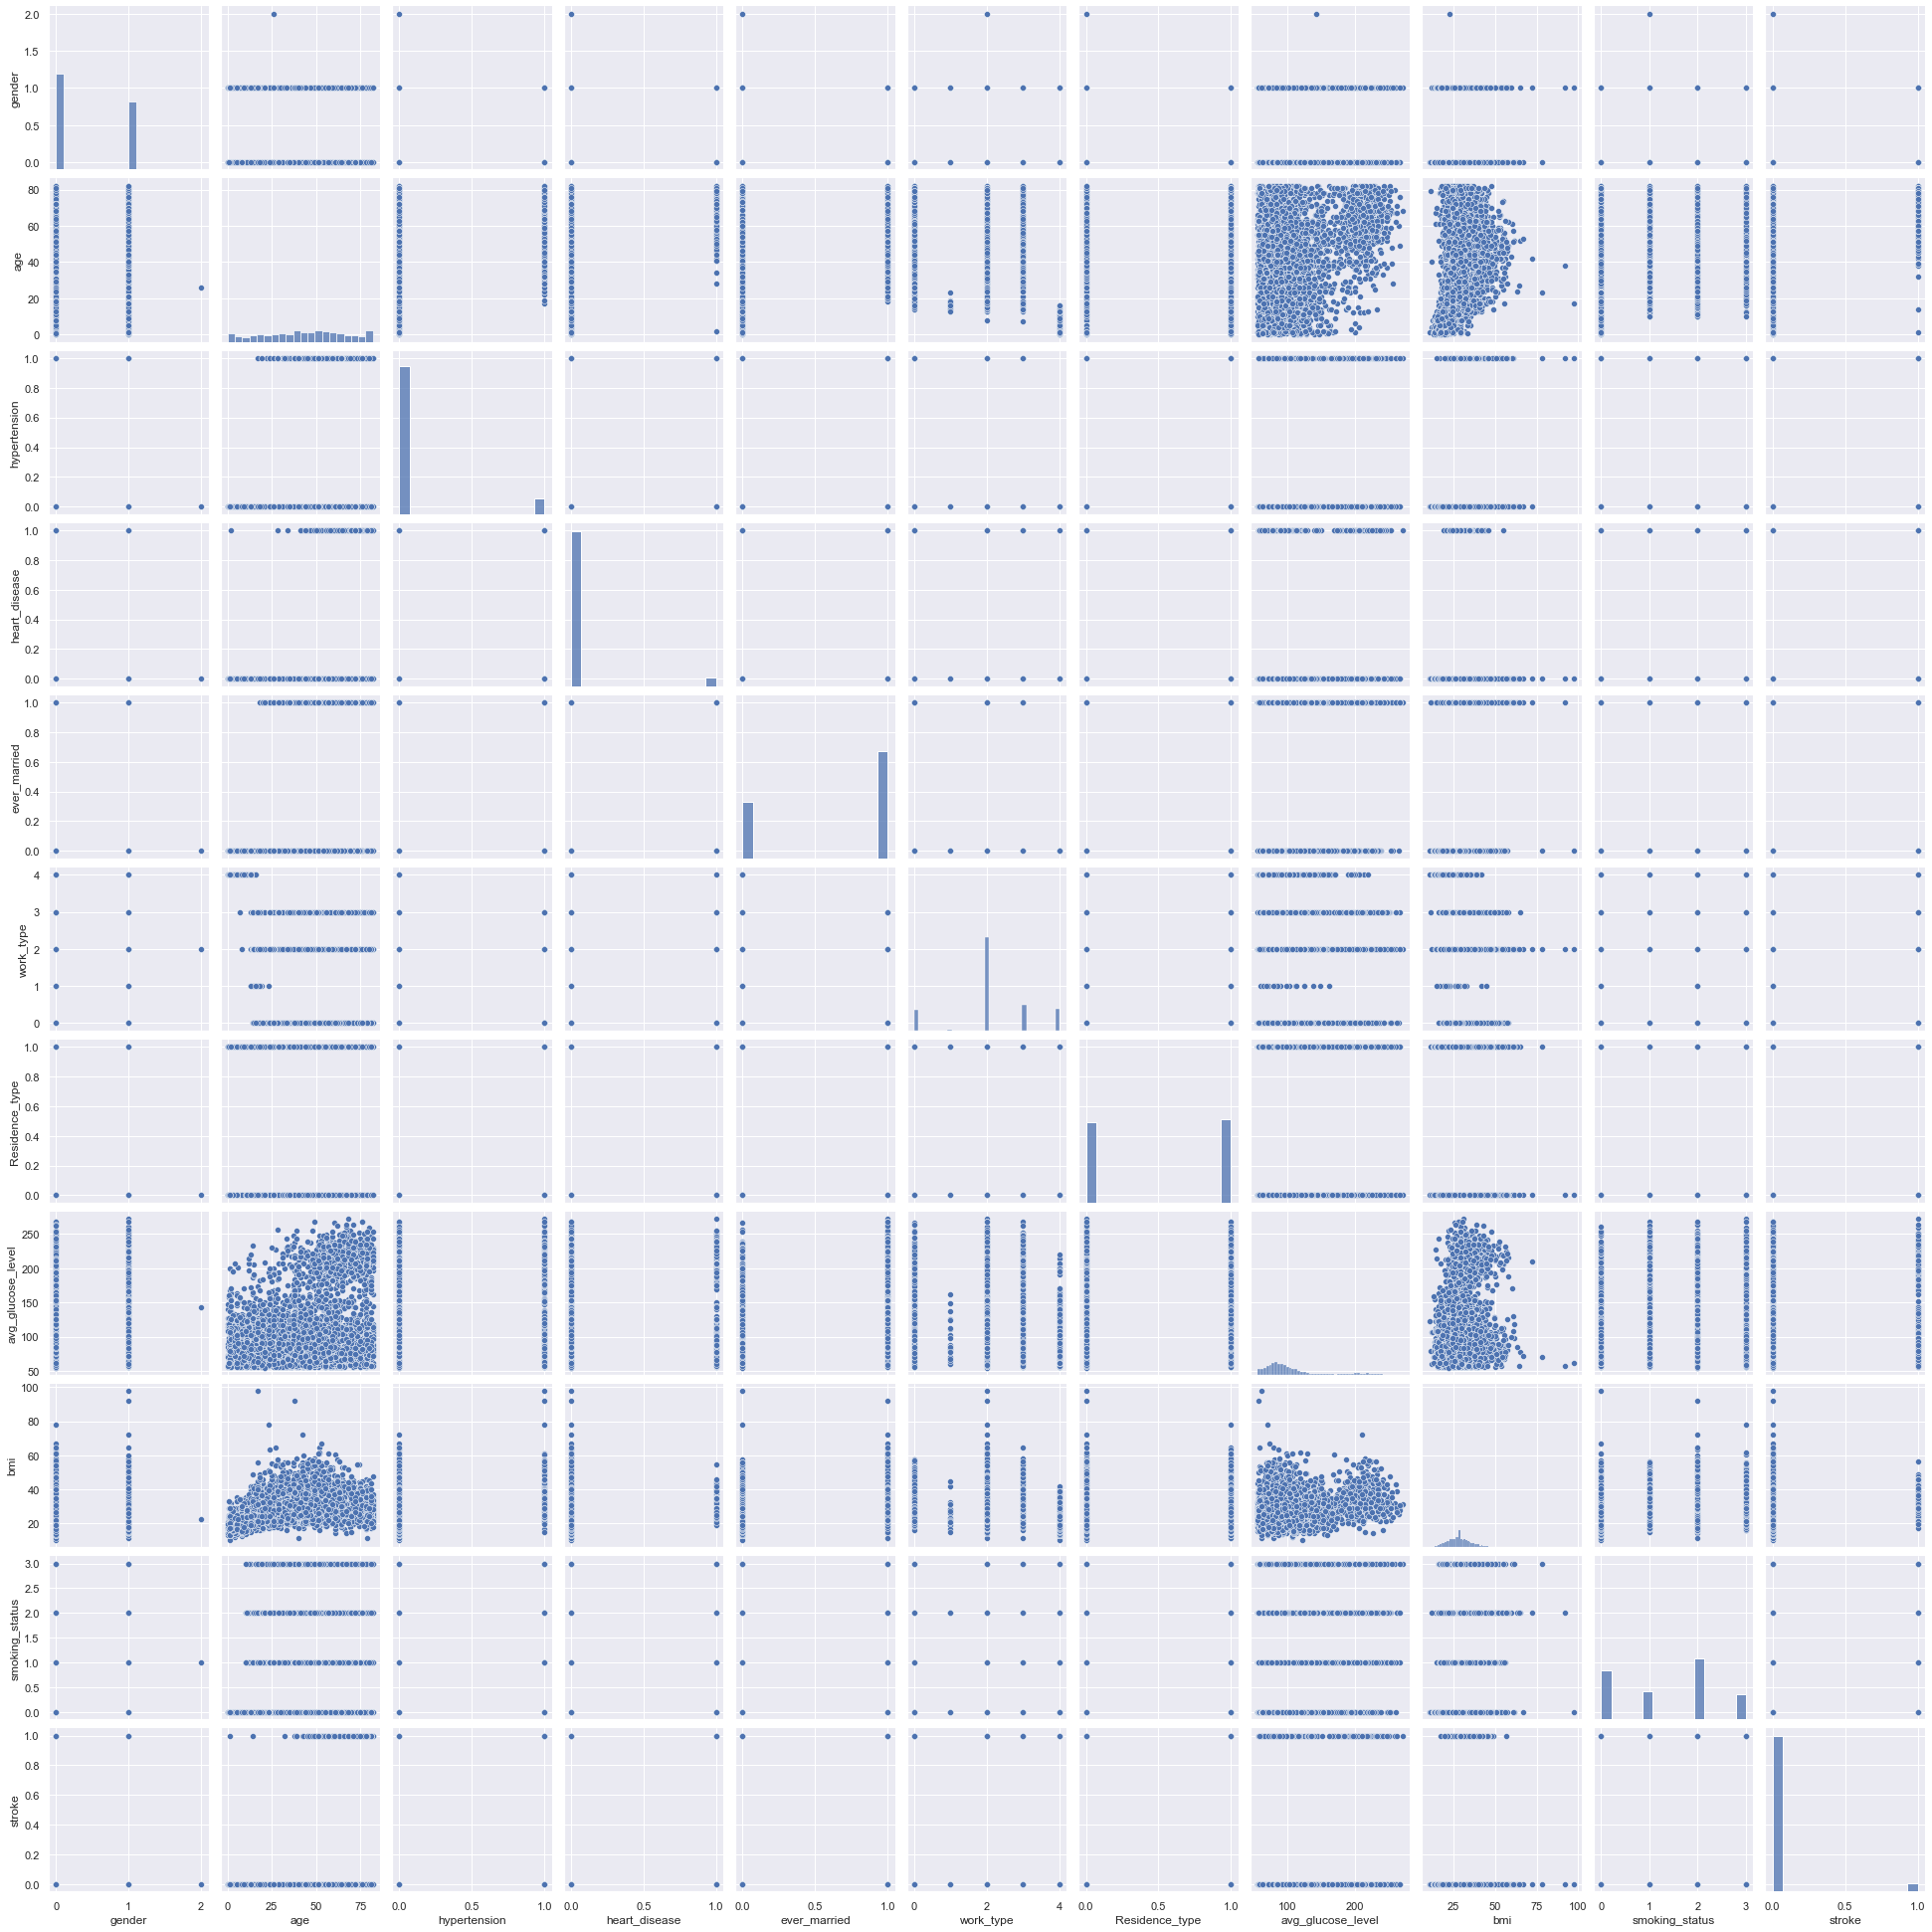

In [58]:
sns.pairplot(df)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q18. Plot the heatmap for correlation matrix for the given dataset. Write the observation.
Especially note down columns that are highly correlated (Positive or negative correlation,
consider 0.7 to 1 as high).
</b>
                </font>
            </div>
        </td>
    </tr>

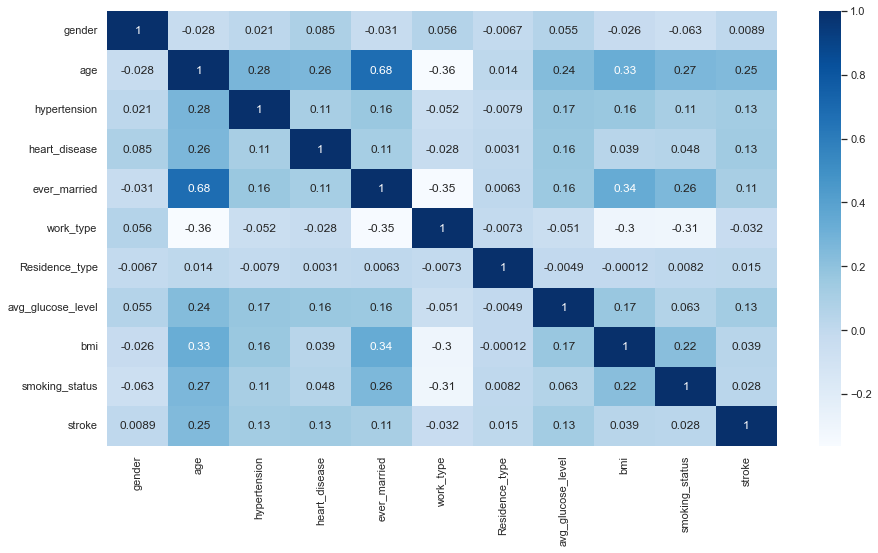

In [59]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

- There are no columns in our dataframe which are Highly Correlated ( within the range 0.7 to 1 ).
- age and ever_married features and moderately correlation with a value of 0.68.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q19. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.
</b>
                </font>
            </div>
        </td>
    </tr>

In [60]:
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=16)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3577, 9) (1533, 9) (3577,) (1533,)


In [62]:
X_train

age  hypertension  heart_disease  ever_married  work_type  \
4763  82.0             0              0             1          2   
2965  79.0             1              0             0          2   
232   73.0             0              0             1          3   
4155  53.0             1              0             1          2   
2937  44.0             0              0             1          2   
...    ...           ...            ...           ...        ...   
4548  49.0             0              0             1          2   
635   57.0             0              0             1          2   
1345  47.0             0              0             1          2   
581   18.0             0              0             0          3   
2169   9.0             0              0             0          4   

      Residence_type  avg_glucose_level   bmi  smoking_status  
4763               1             217.57  33.5               1  
2965               1              96.52  21.7               0  
232                1              70.94  34.4               2  
4155               0              77.94  33.0               2  
2937               1              63.60  37.3               2  
...              ...                ...   ...             ...  
4548               0              58.42  32.8               1  
635                0              98.54  30.2               2  
1345               1             112.09  24.7               3  
581                0             182.86  21.0               0  
2169               1             170.76  20.0               0  

[3577 rows x 9 columns]

In [63]:
X_test

age  hypertension  heart_disease  ever_married  work_type  \
201   80.00             1              1             1          2   
243   68.00             1              1             1          2   
1602  62.00             0              0             1          0   
1293  46.00             1              0             1          2   
2739   5.00             0              0             0          4   
...     ...           ...            ...           ...        ...   
2060  59.00             0              0             1          2   
3319   1.08             0              0             0          4   
3780  49.00             0              0             1          2   
2721  17.00             0              0             0          1   
2209  78.00             1              0             1          3   

      Residence_type  avg_glucose_level        bmi  smoking_status  
201                1             175.29  31.500000               1  
243                1             247.51  40.500000               1  
1602               0              73.44  23.400000               0  
1293               0              73.72  28.893237               3  
2739               0             105.18  28.893237               0  
...              ...                ...        ...             ...  
2060               0              93.90  42.200000               2  
3319               1             159.39  12.800000               0  
3780               1             175.74  45.400000               0  
2721               0              88.57  31.100000               2  
2209               0              75.19  27.600000               2  

[1533 rows x 9 columns]

In [64]:
y_train

4763    0
2965    0
232     1
4155    0
2937    0
       ..
4548    0
635     0
1345    0
581     0
2169    0
Name: stroke, Length: 3577, dtype: int64

In [65]:
y_test

201     1
243     1
1602    0
1293    0
2739    0
       ..
2060    0
3319    0
3780    0
2721    0
2209    0
Name: stroke, Length: 1533, dtype: int64

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q20. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach
to balanced the dataset by using the correct technique.
</b>
                </font>
            </div>
        </td>
    </tr>

<AxesSubplot:xlabel='stroke', ylabel='count'>

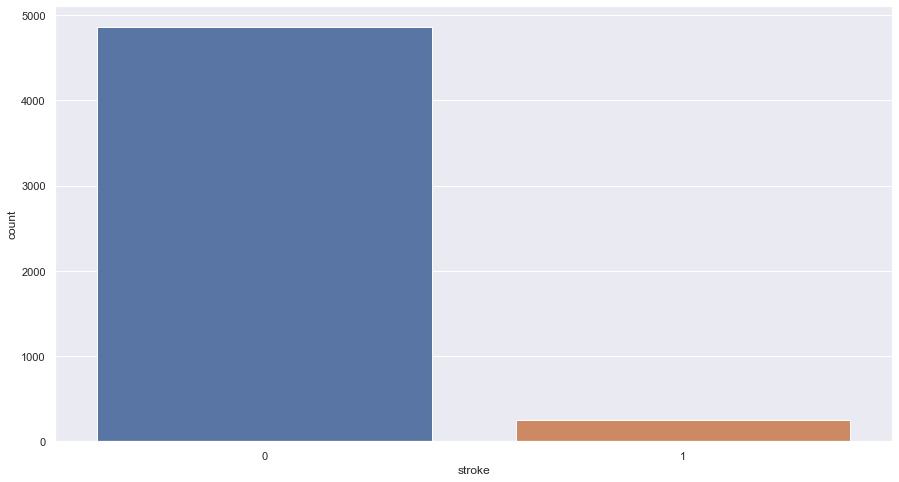

In [66]:
sns.countplot(x='stroke', data=df)

The data is higly imbalanced.

Since STROKE is highly imbalanced, there are two ways to deal with it. We can either undersample the majority class or we could oversample the minority class.

We will be using oversampling technique for this project.

The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

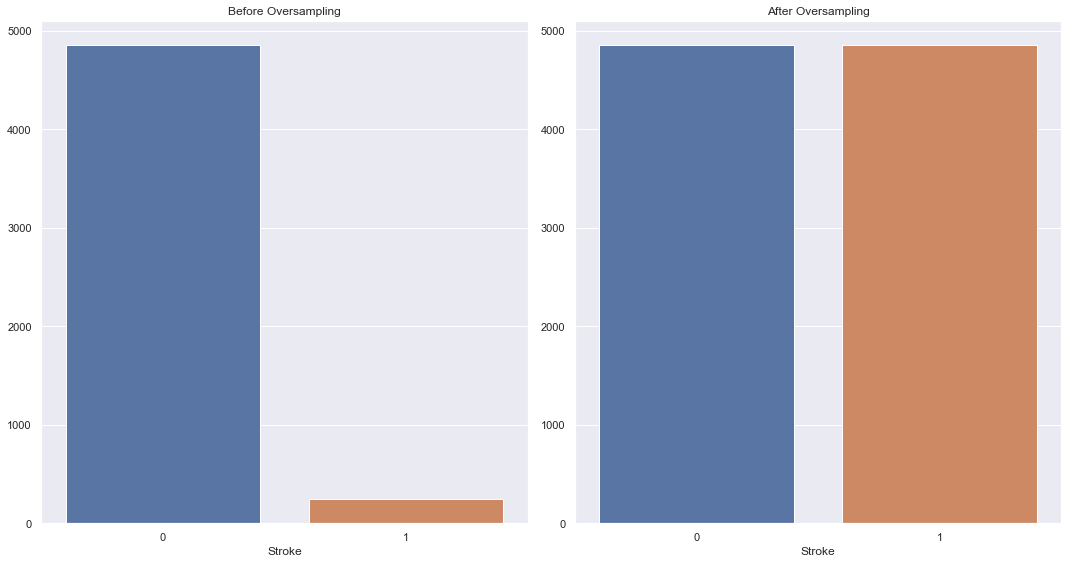

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax1)
ax1.set_title("Before Oversampling")
ax1.set_xlabel('Stroke')

#Using SMOTE to balance the Data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2) 
X, y = sm.fit_resample(X, y) 

sns.barplot(x=['0', '1'], y =[sum(y == 0), sum(y == 1)], ax = ax2)
ax2.set_title("After Oversampling")
ax2.set_xlabel('Stroke')

plt.tight_layout()
plt.show()

In [68]:
# Spliting the Data into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Q21. Model Selection/hyperparameter tuning
</b>
                </font>
            </div>
        </td>
    </tr>

### 1. MODEL SELECTION

In [69]:
model_list = []
model_list.append(['XGBClassifier',XGBClassifier(learning_rate=0.1,objective='binary:logistic',random_state=0,eval_metric='mlogloss')])
model_list.append(['Logistic Regression',LogisticRegression(random_state=0)])
model_list.append(['SVM',SVC(random_state=0)])
model_list.append(['KNeigbors',KNeighborsClassifier()])
model_list.append(['GaussianNB',GaussianNB()])
model_list.append(['BernoulliNB',BernoulliNB()])
model_list.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
model_list.append(['RandomForest',RandomForestClassifier(random_state=0)])
model_list.append(['AdaBoostClassifier',AdaBoostClassifier()])

In [72]:
lst_1 = []
for m in range(len(model_list)):
    lst_2 = []
    model = model_list[m][1]
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X_train,y = y_train, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    
    print(model_list[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('')
    print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean()*100))
    print('')
    print('Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('')
    print('Precision: {:.2f} %'.format(precision))
    print('')
    print('Recall: {:.2f} %'.format(recall))
    print('')
    print('F1 Score: {:.2f} %'.format(f1))
    print('-'*40)
    print('')
    lst_2.append(model_list[m][0])
    lst_2.append(accuracy_score(y_test,y_pred)*100)
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

XGBClassifier :
[[1279  146]
 [  70 1422]]
Accuracy Score:  0.9259513198491601

K-Fold Validation Mean Accuracy: 91.77 %

Standard Deviation: 1.20 %

ROC AUC Score: 0.93 %

Precision: 0.91 %

Recall: 0.95 %

F1 Score: 0.93 %
----------------------------------------



C:\Users\praty\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\praty\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\praty\anaconda3\lib\site-packages

Logistic Regression :
[[1092  333]
 [ 245 1247]]
Accuracy Score:  0.801851217003771

K-Fold Validation Mean Accuracy: 79.94 %

Standard Deviation: 0.88 %

ROC AUC Score: 0.80 %

Precision: 0.79 %

Recall: 0.84 %

F1 Score: 0.81 %
----------------------------------------

SVM :
[[1017  408]
 [ 246 1246]]
Accuracy Score:  0.7757970517655125

K-Fold Validation Mean Accuracy: 76.31 %

Standard Deviation: 1.42 %

ROC AUC Score: 0.77 %

Precision: 0.75 %

Recall: 0.84 %

F1 Score: 0.79 %
----------------------------------------

KNeigbors :
[[1156  269]
 [  33 1459]]
Accuracy Score:  0.8964689749742887

K-Fold Validation Mean Accuracy: 88.20 %

Standard Deviation: 1.00 %

ROC AUC Score: 0.89 %

Precision: 0.84 %

Recall: 0.98 %

F1 Score: 0.91 %
----------------------------------------

GaussianNB :
[[1004  421]
 [ 187 1305]]
Accuracy Score:  0.7915666780939321

K-Fold Validation Mean Accuracy: 78.43 %

Standard Deviation: 1.52 %

ROC AUC Score: 0.79 %

Precision: 0.76 %

Recall: 0.87 %

F1 

In [73]:
df2 = pd.DataFrame(lst_1,columns=['Model','Accuracy','K-Fold Mean Accuracy','Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

df2.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
df2

# COMPARE

Model   Accuracy  K-Fold Mean Accuracy  Std.Deviation  \
7         RandomForest  93.520740             93.402349       1.238528   
0        XGBClassifier  92.595132             91.771184       1.201621   
6         DecisionTree  89.715461             90.198843       1.473510   
3            KNeigbors  89.646897             88.200009       1.003667   
8   AdaBoostClassifier  82.996229             83.262071       1.766567   
1  Logistic Regression  80.185122             79.941306       0.880355   
4           GaussianNB  79.156668             78.427658       1.519256   
2                  SVM  77.579705             76.311372       1.419636   
5          BernoulliNB  64.141241             62.512870       1.809231   

    ROC_AUC  Precision    Recall  F1 Score  
7  0.934708   0.920052  0.956434  0.937890  
0  0.925313   0.906888  0.953083  0.929412  
6  0.896832   0.890564  0.910858  0.900596  
3  0.894555   0.844329  0.977882  0.906211  
8  0.829006   0.810861  0.870643  0.839690  
1  0.801053   0.789241  0.835791  0.811849  
4  0.789613   0.756083  0.874665  0.811063  
2  0.774402   0.753325  0.835121  0.792117  
5  0.642625   0.669711  0.589812  0.627227

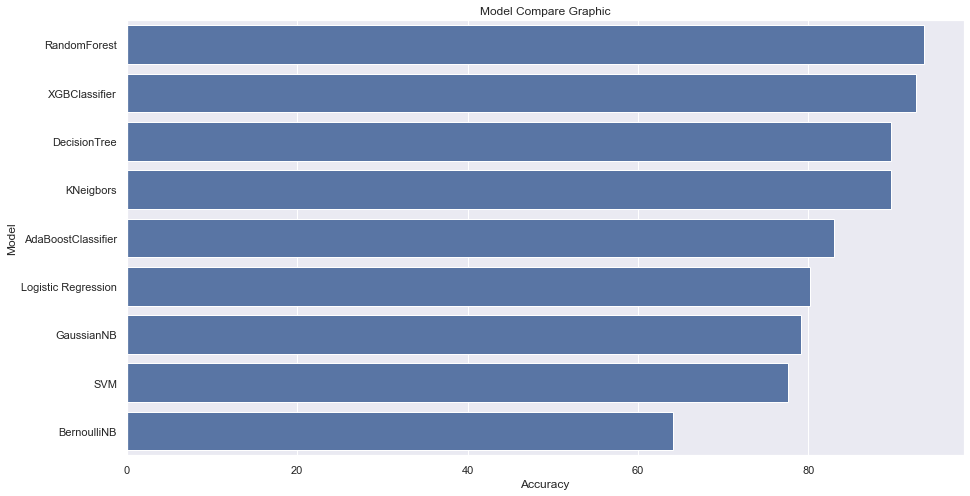

In [74]:
sns.barplot(x='Accuracy',y='Model',data=df2,color='b')
plt.title('Model Compare Graphic');

So we would be selecting the RandomForest Model due to the High Accuracy.

### 2. MODEL TUNING

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1369
           1       0.95      0.92      0.93      1548

    accuracy                           0.93      2917
   macro avg       0.93      0.93      0.93      2917
weighted avg       0.93      0.93      0.93      2917

ROC AUC score: 0.9858158129909224
Accuracy Score:  0.9321220431950634


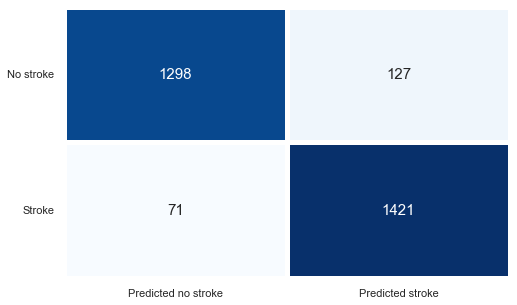

Text(0.5, 0, 'False Positive Rate')

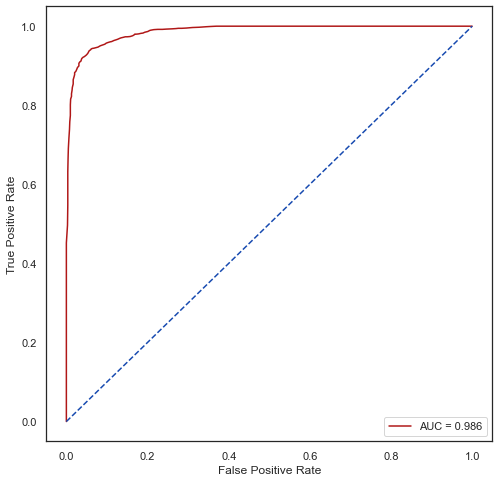

In [75]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
  
# predict the mode
y_pred = classifier.predict(X_test)
  
# performance evaluation metrics
print(classification_report(y_pred, y_test))

y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)[:,1]
cm = confusion_matrix(y_test, y_pred)

print(f'ROC AUC score: {roc_auc_score(y_test, y_prob)}')
print('Accuracy Score: ',accuracy_score(y_test, y_pred))

# Visualizing Confusion Matrix
plt.figure(figsize = (8, 5))
sns.heatmap(cm, cmap = 'Blues', annot = True, fmt = 'd', linewidths = 5, cbar = False, annot_kws = {'fontsize': 15}, 
            yticklabels = ['No stroke', 'Stroke'], xticklabels = ['Predicted no stroke', 'Predicted stroke'])
plt.yticks(rotation = 0)
plt.show()

# Roc Curve
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

According to the Confusion Matrix, we have 2719 correct predictions and 198 incorrect predictions.